In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
# Path to your .log file containing JSON data
file_path = 'tradehistory.log'

# Open the .log file and load the JSON content
with open(file_path, 'r') as file:
    data = json.load(file)

In [22]:
df = pd.DataFrame(data)
df.head()

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,,SUBMISSION,AMETHYSTS,SEASHELLS,10002,1
1,0,,,STARFRUIT,SEASHELLS,5003,1
2,0,,,STARFRUIT,SEASHELLS,5003,13
3,1100,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,10
4,1200,SUBMISSION,,AMETHYSTS,SEASHELLS,9998,1


In [23]:
amethyst = df[df['symbol'] == 'AMETHYSTS']
starfruit = df[df['symbol'] == 'STARFRUIT']

In [36]:
my_amethyst = amethyst[(amethyst['buyer'] == 'SUBMISSION') | (amethyst['seller'] == 'SUBMISSION')]
my_starfruit = starfruit[(starfruit['buyer'] == 'SUBMISSION') | (starfruit['seller'] == 'SUBMISSION')]

,timestamp,buyer,seller,symbol,currency,price,quantity
32,5600,,SUBMISSION,STARFRUIT,SEASHELLS,5002,2
42,7000,,SUBMISSION,STARFRUIT,SEASHELLS,5002,4
54,10300,,SUBMISSION,STARFRUIT,SEASHELLS,5001,1
65,11700,,SUBMISSION,STARFRUIT,SEASHELLS,4998,2
82,15200,,SUBMISSION,STARFRUIT,SEASHELLS,4998,1
91,15800,,SUBMISSION,STARFRUIT,SEASHELLS,5002,1
98,16700,,SUBMISSION,STARFRUIT,SEASHELLS,5001,1
100,17700,,SUBMISSION,STARFRUIT,SEASHELLS,5001,1
112,20300,,SUBMISSION,STARFRUIT,SEASHELLS,4997,1
118,20900,,SUBMISSION,STARFRUIT,SEASHELLS,5000,1


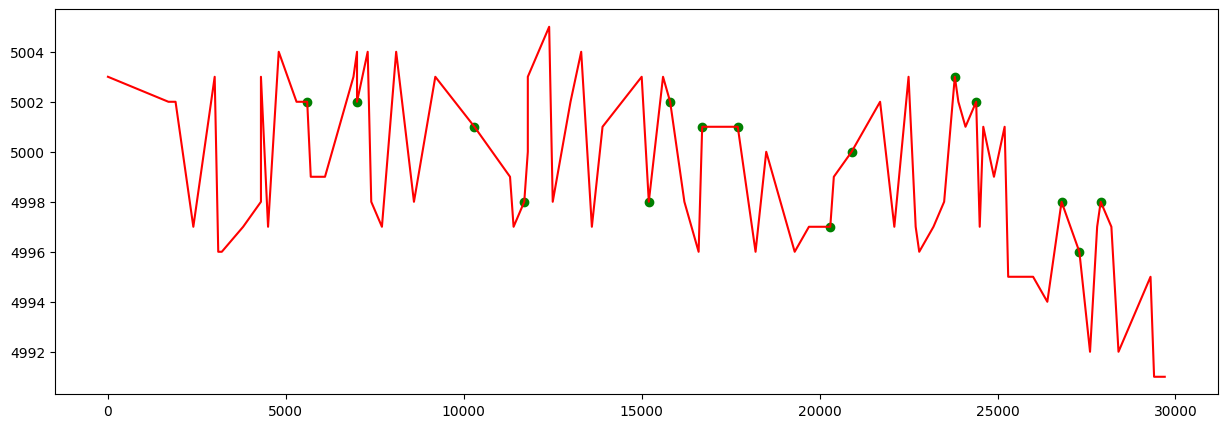

In [35]:
plot_starfruit = starfruit[starfruit['timestamp'] < 30000]
plot_my_starfruit = my_starfruit[my_starfruit['timestamp'] < 30000]

plt.figure(figsize=(15, 5))
plt.plot(plot_starfruit['timestamp'], plot_starfruit['price'], 'r', label='Starfruit')
plt.scatter(plot_my_starfruit['timestamp'], plot_my_starfruit['price'], c='g', label='My Starfruit')

In [37]:
data = pd.read_csv('activity.csv')
data.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2.0,0.0,AMETHYSTS,10002.0,1.0,9996.0,2.0,9995.0,29.0,10004.0,2.0,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-2.0,0.0,STARFRUIT,5002.0,1.0,4997.0,31.0,NaN,NaN,5003.0,31.0,NaN,NaN,NaN,NaN,5002.5,0.0
2,-2.0,100.0,AMETHYSTS,9996.0,2.0,9995.0,22.0,NaN,NaN,10004.0,2.0,10005.0,22.0,NaN,NaN,10000.0,4.0
3,-2.0,100.0,STARFRUIT,4997.0,24.0,NaN,NaN,NaN,NaN,5003.0,2.0,5004.0,22.0,NaN,NaN,5000.0,0.0
4,-2.0,200.0,STARFRUIT,4997.0,2.0,4996.0,20.0,NaN,NaN,5003.0,20.0,NaN,NaN,NaN,NaN,5000.0,0.0


In [40]:
starfruit_data = data[data['product'] == 'STARFRUIT']
plot_starfruit_data = starfruit_data[starfruit_data['timestamp'] < 30000]


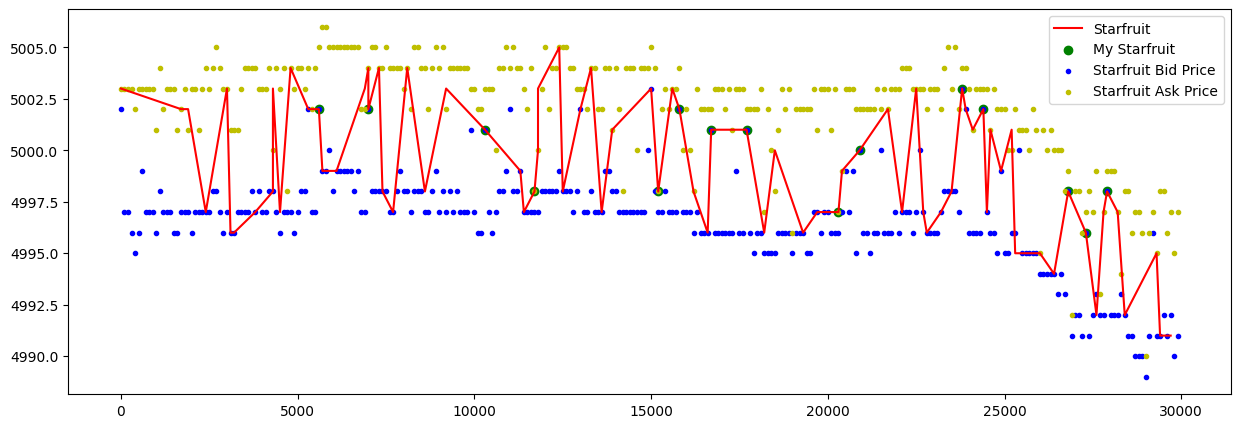

In [42]:
plt.figure(figsize=(15, 5))
plt.plot(plot_starfruit['timestamp'], plot_starfruit['price'], 'r', label='Starfruit')
plt.scatter(plot_my_starfruit['timestamp'], plot_my_starfruit['price'], c='g', label='My Starfruit')
plt.scatter(plot_starfruit_data['timestamp'], plot_starfruit_data['bid_price_1'], c='b', label='Starfruit Bid Price', marker = '.')
plt.scatter(plot_starfruit_data['timestamp'], plot_starfruit_data['ask_price_1'], c='y', label='Starfruit Ask Price', marker = '.')
plt.legend()
plt.show()